# **1. EXPLORATORY DATA ANALYSIS (EDA)**

## **Reading Dataset**

In [1]:
import pandas as pd
df = pd.read_csv("dataset_sosmed.csv", sep=';')

## **Analyzing the Data**

In [2]:
# cetak 5 baris pertama di dataframe
df.head()

,instruction,input,output
0,Buatkan komentar positif untuk foto pemandanga...,"Foto panorama pantai dengan ombak tenang, lang...","Indahnya sunset di pantai ini, bikin hati adem..."
1,Tulis komentar negatif terhadap berita yang me...,Sebuah akun media sosial menyebarkan berita bo...,"Berita hoax lagi, jangan asal percaya sama inf..."
2,Berikan komentar netral pada postingan tentang...,Seorang kritikus film membagikan daftar 5 film...,Rekomendasi film keluarga ini lumayan banyak y...
3,Buat komentar positif untuk pencapaian atlet p...,Atlet paralimpiade Indonesia berhasil meraih m...,Luar biasa! Semangat juangmu menginspirasi ban...
4,Tulis komentar negatif tentang kualitas layana...,Pasien mengeluh tentang antrean yang sangat pa...,Pelayanan puskesmas kok makin gak manusiawi ya...


In [3]:
# cetak 5 baris terakhir di dataframe
df.tail()

,instruction,input,output
1152,Berikan komentar positif untuk inisiatif pengu...,Sebuah hotel mewah menerapkan sistem pengelola...,Inisiatif yang patut dicontong! Hotel peduli l...
1153,Tulis komentar negatif untuk berita tentang fa...,Foto-foto viral menunjukkan kondisi gedung sek...,Sekolah kok dibiarin rusak gini? Kasihan anak-...
1154,Berikan komentar netral untuk postingan tentan...,Informasi tentang jam operasional dan koleksi ...,Museum bahari ini ada banyak koleksi kapal tra...
1155,Tulis komentar positif untuk keberhasilan prog...,Sebuah LSM berhasil memberdayakan ibu-ibu di d...,Luar biasa! Ibu-ibu di desa jadi mandiri secar...
1156,Berikan komentar negatif untuk pelayanan call ...,Keluhan pengguna tentang call center sebuah pe...,Call center-nya susah banget dihubungi! Sekali...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  1157 non-null   object
 1   input        1157 non-null   object
 2   output       1157 non-null   object
dtypes: object(3)
memory usage: 27.2+ KB


## **Check Duplicated**

In [5]:
df.duplicated().sum()

11

## **Check Missing Values**

In [6]:
df.isnull().sum()

instruction    0
input          0
output         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  1157 non-null   object
 1   input        1157 non-null   object
 2   output       1157 non-null   object
dtypes: object(3)
memory usage: 27.2+ KB


# **2. PRE-PROCESSING DATA**

## **Remove Data Duplicate**

In [8]:
df.drop_duplicates(inplace = True)

**Saving the Clean Dataset**

In [9]:
import csv
df.to_csv("dataset_sosmed_new.csv", index=False, sep=';', quoting=csv.QUOTE_NONE, escapechar='\\')

## **Check Lenght of Words**

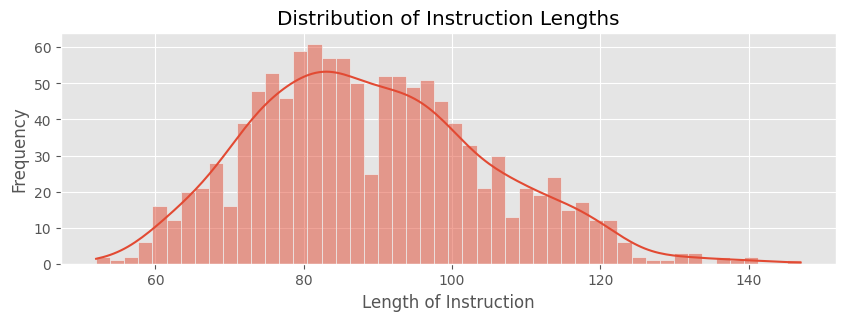

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df['Instruction_length'] = df['instruction'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(df['Instruction_length'], bins=50, kde=True)
plt.title('Distribution of Instruction Lengths')
plt.xlabel('Length of Instruction')
plt.ylabel('Frequency')
plt.show()

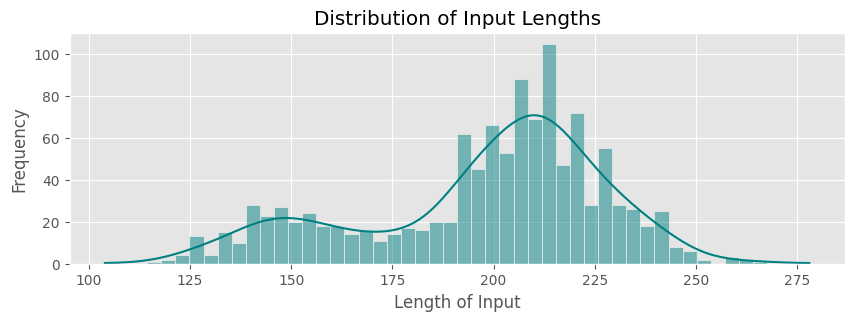

In [11]:
df['Input_length'] = df['input'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(df['Input_length'], bins=50, kde=True, color='teal')
plt.title('Distribution of Input Lengths')
plt.xlabel('Length of Input')
plt.ylabel('Frequency')
plt.show()

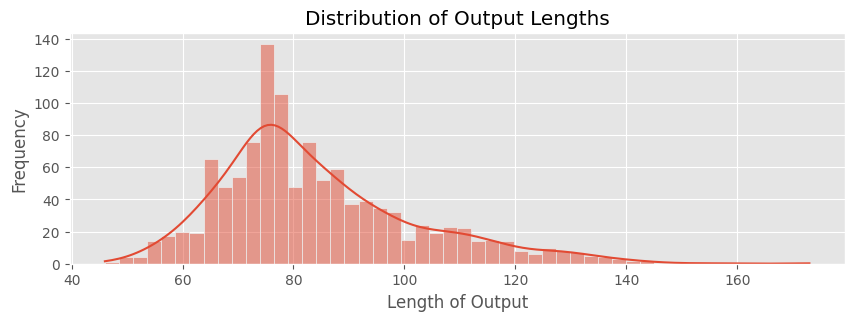

In [12]:
df['Output_length'] = df['output'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(df['Output_length'], bins=50, kde=True)
plt.title('Distribution of Output Lengths')
plt.xlabel('Length of Output')
plt.ylabel('Frequency')
plt.show()

## **Wordcloud**

In [13]:
dftranspose = pd.DataFrame(df['output'])

# Transpose the column to a row (excluding the column name)
transposed = dftranspose.T.reset_index(drop=True)

# Export the transposed row to a TXT file
transposed.to_csv('output_comments.txt', index=False, header=False)

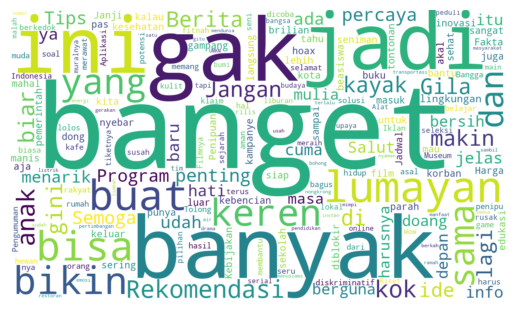

In [14]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

#Importing Dataset
TXT_FILE = "output_comments.txt"

#Creating the text variable
text = open(TXT_FILE, mode="r", encoding="utf-8").read()

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', height=700, width=1200).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()